In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [3]:
ulkegt = pd.read_csv('states_all_cleaned.csv', index_col=0)
ulkegt

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915843.196105,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,57948.000000,58025.000000,41167.00000,4.715640e+05,1.963860e+05,6.761740e+05,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,915843.196105,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,...,9748.000000,8789.000000,6714.00000,7.911700e+04,3.084700e+04,1.123350e+05,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,915843.196105,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,...,55433.000000,49081.000000,37410.00000,4.371270e+05,1.752100e+05,6.148810e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915843.196105,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,...,34632.000000,36011.000000,27651.00000,2.813380e+05,1.231130e+05,4.052590e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915843.196105,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.000000,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,263.307067
5,1992_COLORADO,COLORADO,1992,915843.196105,3.185173e+06,1.632530e+05,1.307986e+06,1.713934e+06,3.264826e+06,1.642466e+06,...,50648.000000,45025.000000,34533.00000,3.949040e+05,1.602990e+05,5.626130e+05,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,915843.196105,3.834302e+06,1.435420e+05,1.342539e+06,2.348221e+06,3.721338e+06,2.148041e+06,...,38058.000000,33691.000000,28366.00000,3.042840e+05,1.269170e+05,4.369320e+05,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,915843.196105,6.452330e+05,4.594500e+04,4.209420e+05,1.783460e+05,6.387840e+05,3.727220e+05,...,8272.000000,8012.000000,6129.00000,6.749500e+04,2.833800e+04,9.629600e+04,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,915843.196105,7.094800e+05,6.474900e+04,0.000000e+00,6.447310e+05,7.428930e+05,3.291600e+05,...,5832.000000,5000.000000,3433.00000,4.700900e+04,1.817300e+04,7.000000e+04,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,915843.196105,1.150630e+07,7.884200e+05,5.683949e+06,5.033930e+06,1.130564e+07,5.166374e+06,...,164416.000000,142372.000000,100835.00000,1.276685e+06,5.115570e+05,1.819706e+06,213.689751,259.908848,204.882606,262.118986


In [7]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,5)

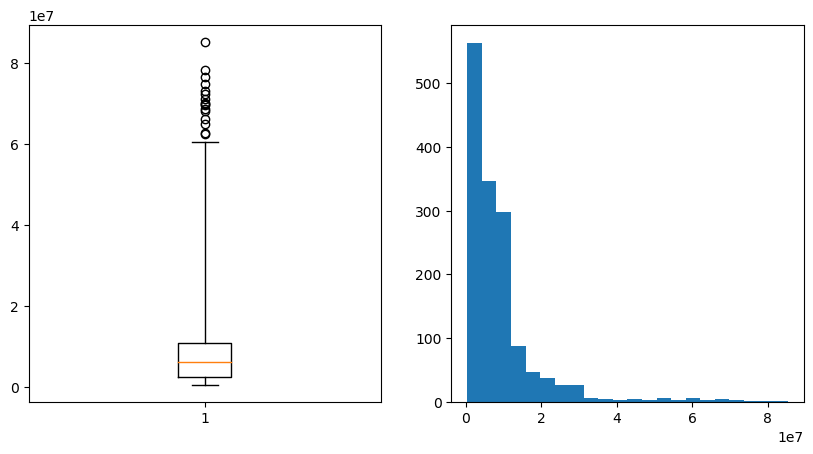

In [32]:
plt.subplot(121)
plt.boxplot(ulkegt['TOTAL_EXPENDITURE'], whis=6)

plt.subplot(122)
plt.hist(ulkegt['TOTAL_EXPENDITURE'], bins=22) # as we see from these graphs, there are many outliers 

plt.show()

In [12]:
zskor = zscore(ulkegt['TOTAL_EXPENDITURE'])

for i in range(1,5):
    print('{} esik degerine gore :'.format(i))
    print('asiri degerlerin sayisi :{}'.format(len(np.where(zskor > i)[0])))
    print('--------')

1 esik degerine gore :
asiri degerlerin sayisi :140
--------
2 esik degerine gore :
asiri degerlerin sayisi :57
--------
3 esik degerine gore :
asiri degerlerin sayisi :41
--------
4 esik degerine gore :
asiri degerlerin sayisi :27
--------


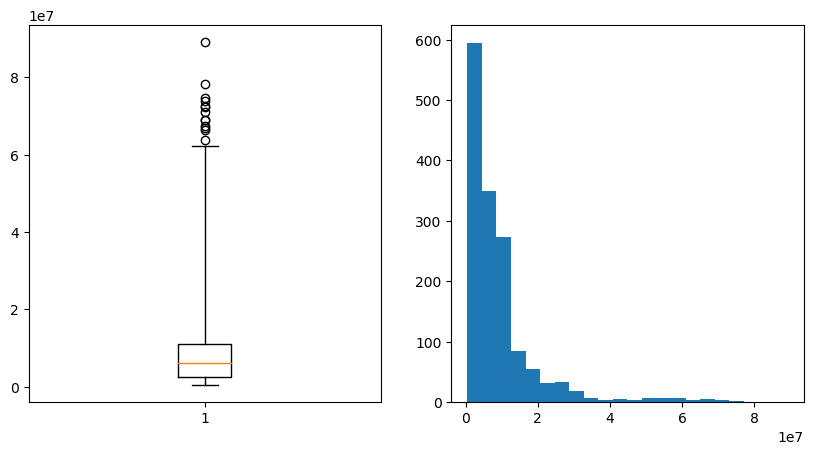

In [33]:
plt.subplot(121)
plt.boxplot(ulkegt['TOTAL_REVENUE'], whis=6)

plt.subplot(122)
plt.hist(ulkegt['TOTAL_REVENUE'], bins=22) # we can realize that we have lots of outliers from these graphs

plt.show()

In [13]:
zskor1 = zscore(ulkegt['TOTAL_REVENUE'])

for i in range(1,5):
    print('{} esik degerine gore :'.format(i))
    print('asiri degerlerin sayisi :{}'.format(len(np.where(zskor1 > i)[0])))
    print('--------') # the number of outliers were determined by threshold (from 1 to 4)

1 esik degerine gore :
asiri degerlerin sayisi :138
--------
2 esik degerine gore :
asiri degerlerin sayisi :57
--------
3 esik degerine gore :
asiri degerlerin sayisi :39
--------
4 esik degerine gore :
asiri degerlerin sayisi :28
--------


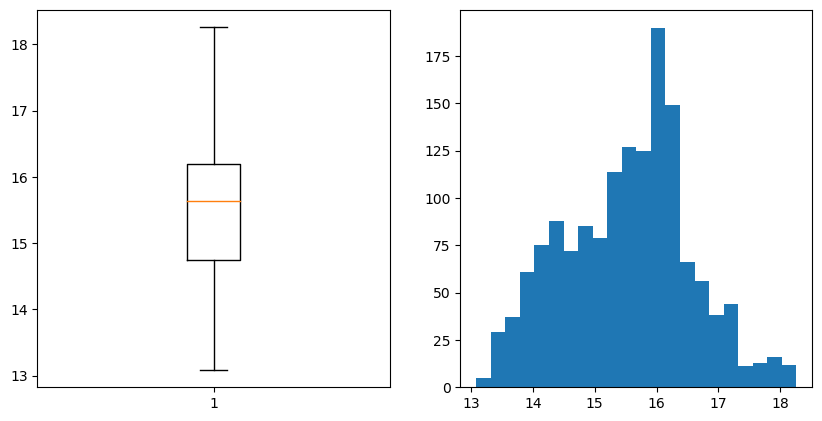

In [20]:
# i am going to try np.log and present the result by histogram and boxplot

plt.subplot(121)
plt.boxplot(np.log(ulkegt['TOTAL_EXPENDITURE']))

plt.subplot(122)
plt.hist(np.log(ulkegt['TOTAL_EXPENDITURE']), bins=22)

plt.show() # i seems that there is no outliers anymore

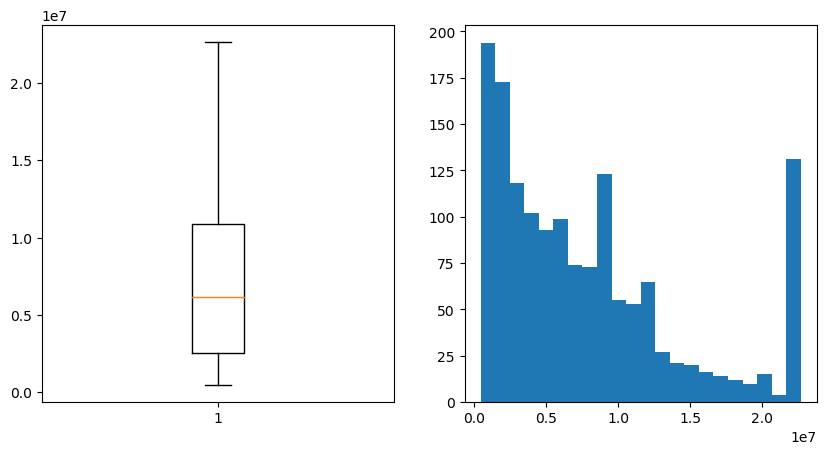

In [30]:
winsorize_goruntulenme = winsorize(ulkegt["TOTAL_EXPENDITURE"], (0, 0.08))

winsorize_goruntulenme

plt.subplot(121)
plt.boxplot(winsorize_goruntulenme)

plt.subplot(122)
plt.hist(winsorize_goruntulenme, bins=22)

plt.show() #using 'winsorize' to limit the outliers is successful but hist graph is not as well as using 'np.log'

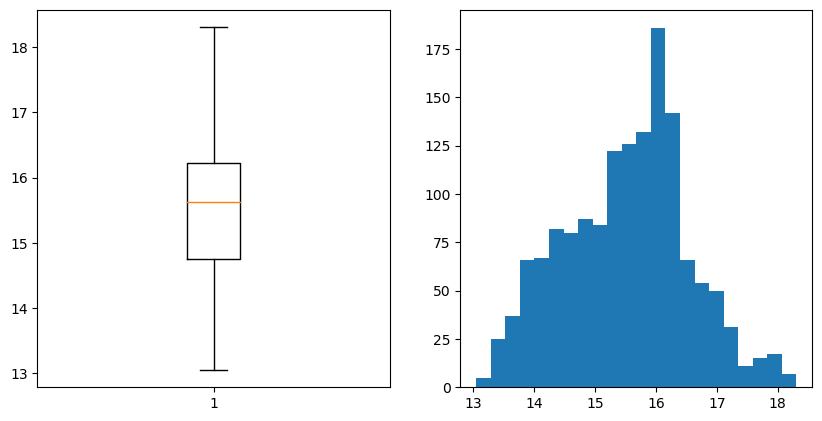

In [21]:
# same way we do..

plt.subplot(121)
plt.boxplot(np.log(ulkegt['TOTAL_REVENUE']))

plt.subplot(122)
plt.hist(np.log(ulkegt['TOTAL_REVENUE']), bins=22)

plt.show()

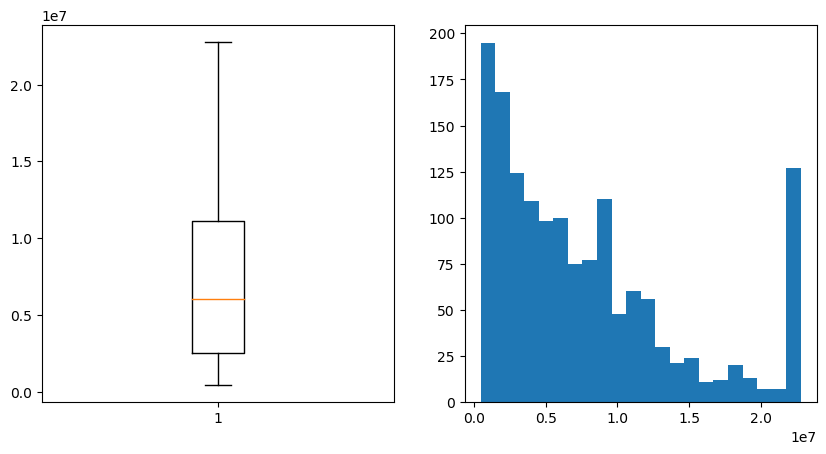

In [31]:
winsorize_goruntulenme = winsorize(ulkegt["TOTAL_REVENUE"], (0, 0.08))

winsorize_goruntulenme

plt.subplot(121)
plt.boxplot(winsorize_goruntulenme)

plt.subplot(122)
plt.hist(winsorize_goruntulenme, bins=22)

plt.show() #The result is the same as 'TOTAL_EXPENDITURE'